# Préparez des données pour un organisme de santé publique - Exploration et analyse

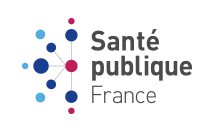

# Sommaire


* [1. Importation des librairies et du fichier nettoyé](#1)
    * [1.1 Importation des librairies](#1_1)
    * [1.2 Importation du fichier](#1_2)
* [2. Analyse univariée](#2)
    * [2.1 Distribution des variables quantitatives](#2_1)
    * [2.2 Répartition des grades Nutri-score](#2_2)
    * [2.3 Nuages de mots](#2_3)
        * [2.3.1 Les noms des produits](#2_3_1)
        * [2.3.2 Les catégories](#2_3_2)
* [3. Analyse multivariée](#3)
    * [3.1 Matrice des corrélations](#3_1)
    * [3.2 Analyse en Composantes Principales (ACP)](#3_2)
        * [3.2.1 Preprocessing des données](#3_2_1)
        * [3.2.2 Eboulie des valeurs propres](#3_2_2)
        * [3.2.3 Informations sur les variables](#3_2_3)
        * [3.2.4 Informations sur les individus](#3_2_4)
* [4. ANOVA](#4)

## 1. Importation des librairies et du fichier nettoyé <a class="anchor" id="1"></a>

### 1.1 Importation des librairies <a class="anchor" id="1_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pour les nuages de mots
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

# Pour l'ACP
from fanalysis.pca import PCA
from sklearn.preprocessing import MinMaxScaler

# Pour l'ANOVA
import statsmodels.formula.api as smf
import statsmodels.api as sm

### 1.2 Importation du fichier <a class="anchor" id="1_2"></a>

In [2]:
# Création du Dataframe 'df'
df_nutri = pd.read_csv('df_nutri.csv', low_memory=False)

## 2. Analyse univariée <a class="anchor" id="2"></a>

### 2.1 Distribution des variables quantitatives <a class="anchor" id="2_1"></a>

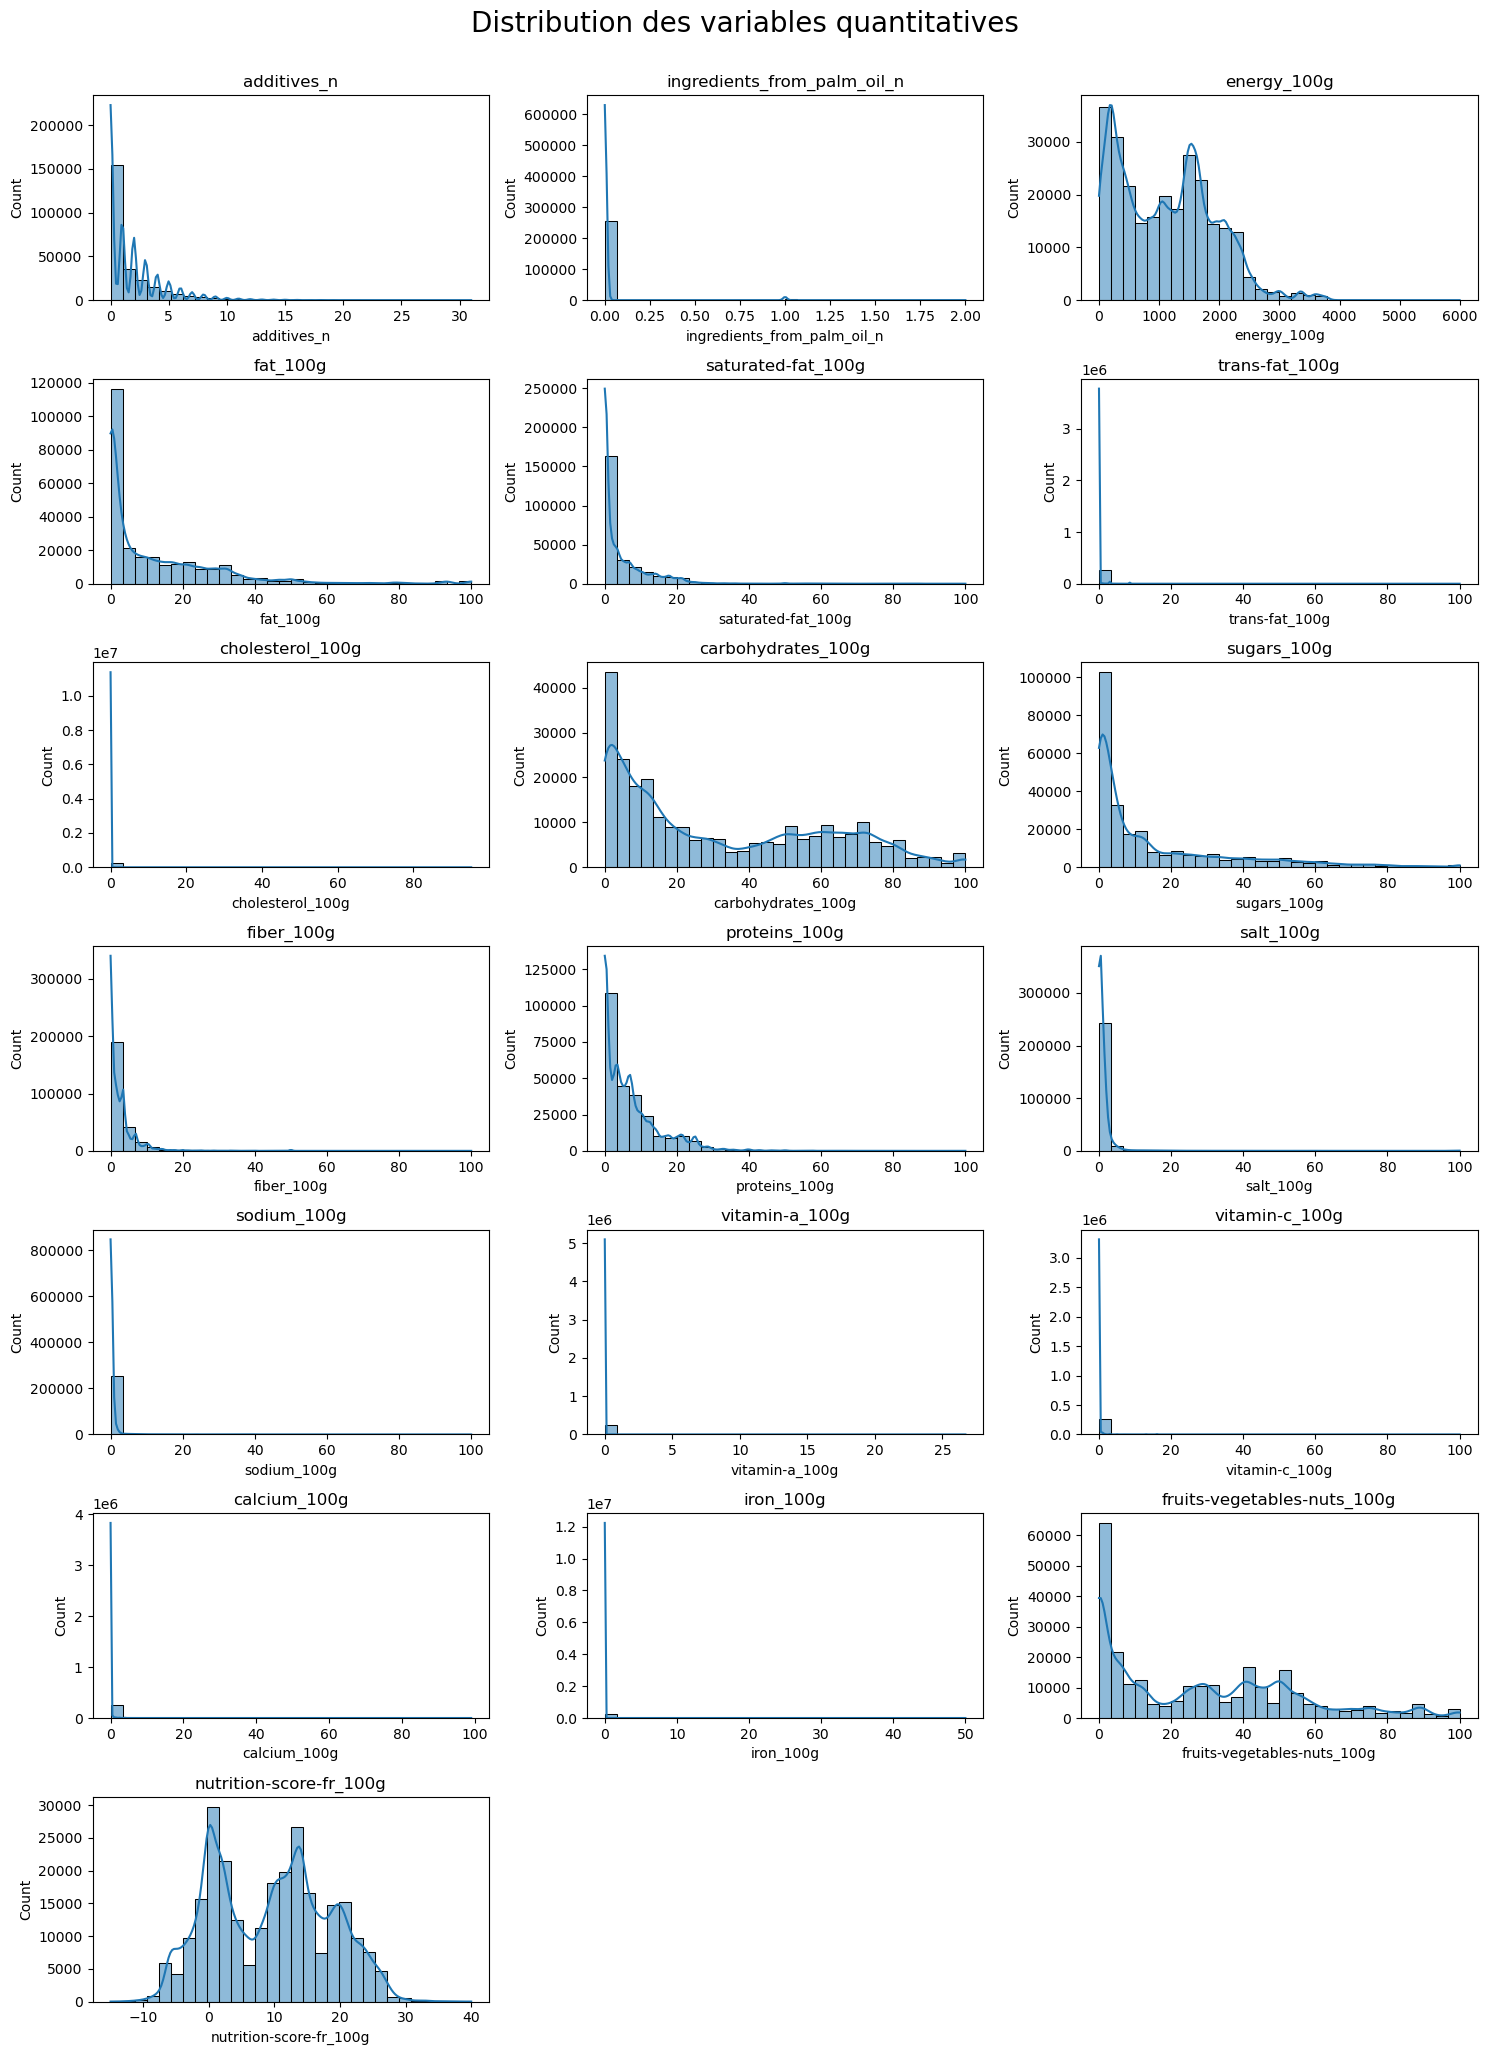

In [3]:
# Sélection des variables à afficher
variable_float64 = df_nutri.select_dtypes(include=['float64']).columns

# Affichons la distribution de chaque nutriment
plt.figure(figsize=(15,20))

for i, colonne in enumerate(df_nutri[variable_float64].columns):
    plt.subplot(7, 3, i+1)
    sns.histplot(df_nutri[colonne], kde=True, bins=30)
    plt.title(colonne)

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Ajouter un titre général au-dessus des sous-graphiques
plt.suptitle('Distribution des variables quantitatives', fontsize=20, y=1.025)

# Afficher le graphique
plt.show()

Les distributions ne suivent pas une loi normale.

Les valeurs modales sont généralement proches de zéro, sauf pour l'énergie et le nutrition-score où elles sont bimodales.

Les distributions sont étalées vers la droite, indiquant des valeurs élevées.

Dans une distribution étalée vers la droite :
* Le mode est inférieur à la médiane.
* La médiane est inférieure à la moyenne.

### 2.2 Répartition des grades Nutri-score <a class="anchor" id="2_2"></a>

In [4]:
# Prenons les effectifs de nos grades
effectifs = df_nutri['nutrition_grade_fr'].value_counts()
modalités = effectifs.index

tab = pd.DataFrame(modalités, columns = ['grade_nutriscore'])

tab['effectif'] = effectifs.values

tab['fréquence'] = round(tab['effectif']/len(df_nutri),3)

# Trier les lignes selon les modalités de la variable grade_nutriscore
tab = tab.sort_values('grade_nutriscore').reset_index(drop=True)

# Calculer la somme cumulée des fréquences
tab['Somme_fréquences_cumulées'] = tab['fréquence'].cumsum()
tab

,grade_nutriscore,effectif,fréquence,Somme_fréquences_cumulées
0,a,36778,0.142,0.142
1,b,42210,0.163,0.305
2,c,54421,0.210,0.515
3,d,75865,0.292,0.807
4,e,50265,0.194,1.001


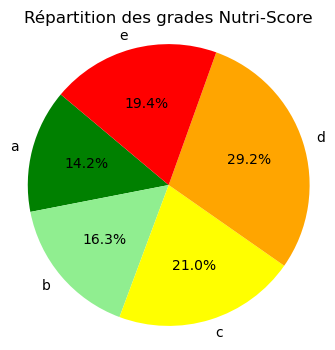

In [5]:
# Définir une palette de couleurs pour Nutri-Score
colors = {'a': 'green', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}

# Créer un pie chart
plt.figure(figsize=(4, 4))
plt.pie(tab['effectif'], labels=tab['grade_nutriscore'], autopct='%1.1f%%', startangle=140,
       colors=[colors[grade] for grade in tab['grade_nutriscore']])
plt.title('Répartition des grades Nutri-Score')
plt.axis('equal') 
plt.show()

Les produits avec des Nutri-Scores allant de "C" à "E" sont les plus représentés.
Implication : Présence dominante de produits potentiellement moins sains.

### 2.3 Nuages de mots <a class="anchor" id="2_3"></a>

#### 2.3.1 Les noms des produits <a class="anchor" id="2_3_1"></a>

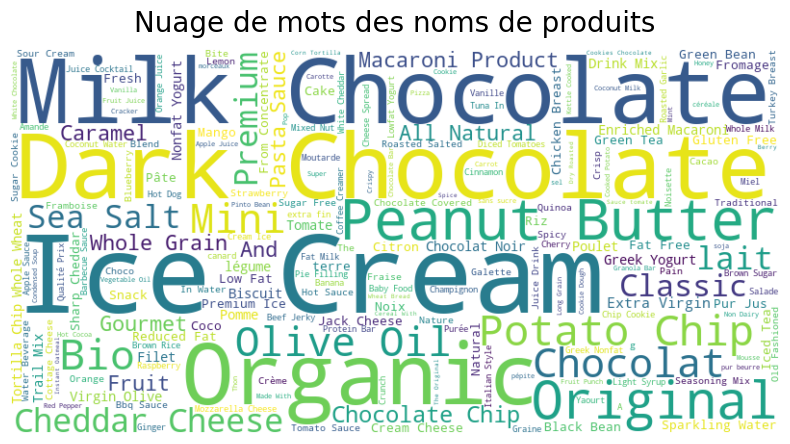

In [6]:
# Créer une chaîne de caractères avec les noms des produits
text_produits = ' '.join(df_nutri['product_name'])

# Créer un ensemble de mots vides (stop words) en français
stop_words = set(stopwords.words('french'))

# Créer le nuage de mots en excluant les mots vides
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_produits)

# Afficher le nuage
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des noms de produits', fontsize=20, y=1.025)
plt.show()

#### 2.3.2 Les catégories <a class="anchor" id="2_3_2"></a>

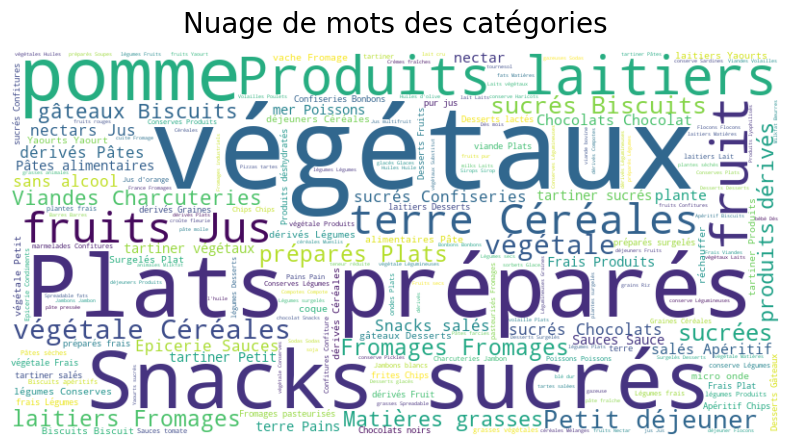

In [7]:
# Créer une chaîne de caractères avec les noms des produits
text_produits = ' '.join(df_nutri['categories_fr'])

# Créer un ensemble de mots vides (stop words) en français
stop_words = set(stopwords.words('french'))
stop_words.update(['non', 'renseigné', "d'origine", 'base', 'boissons', 'boisson', 'Aliments'])

# Créer le nuage de mots en excluant les mots vides
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_produits)

# Afficher le nuage
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots des catégories', fontsize=20, y=1.025)
plt.show()

## 3. Analyse multivariée <a class="anchor" id="3"></a>

### 3.1 Matrice des corrélations <a class="anchor" id="3_1"></a>

Avant d'aborder l'analyse multivariée, une analyse bivariée préliminaire est essentielle.
Elle nous permet de détecter les corrélations entre les variables, ce qui peut orienter nos prochaines étapes.

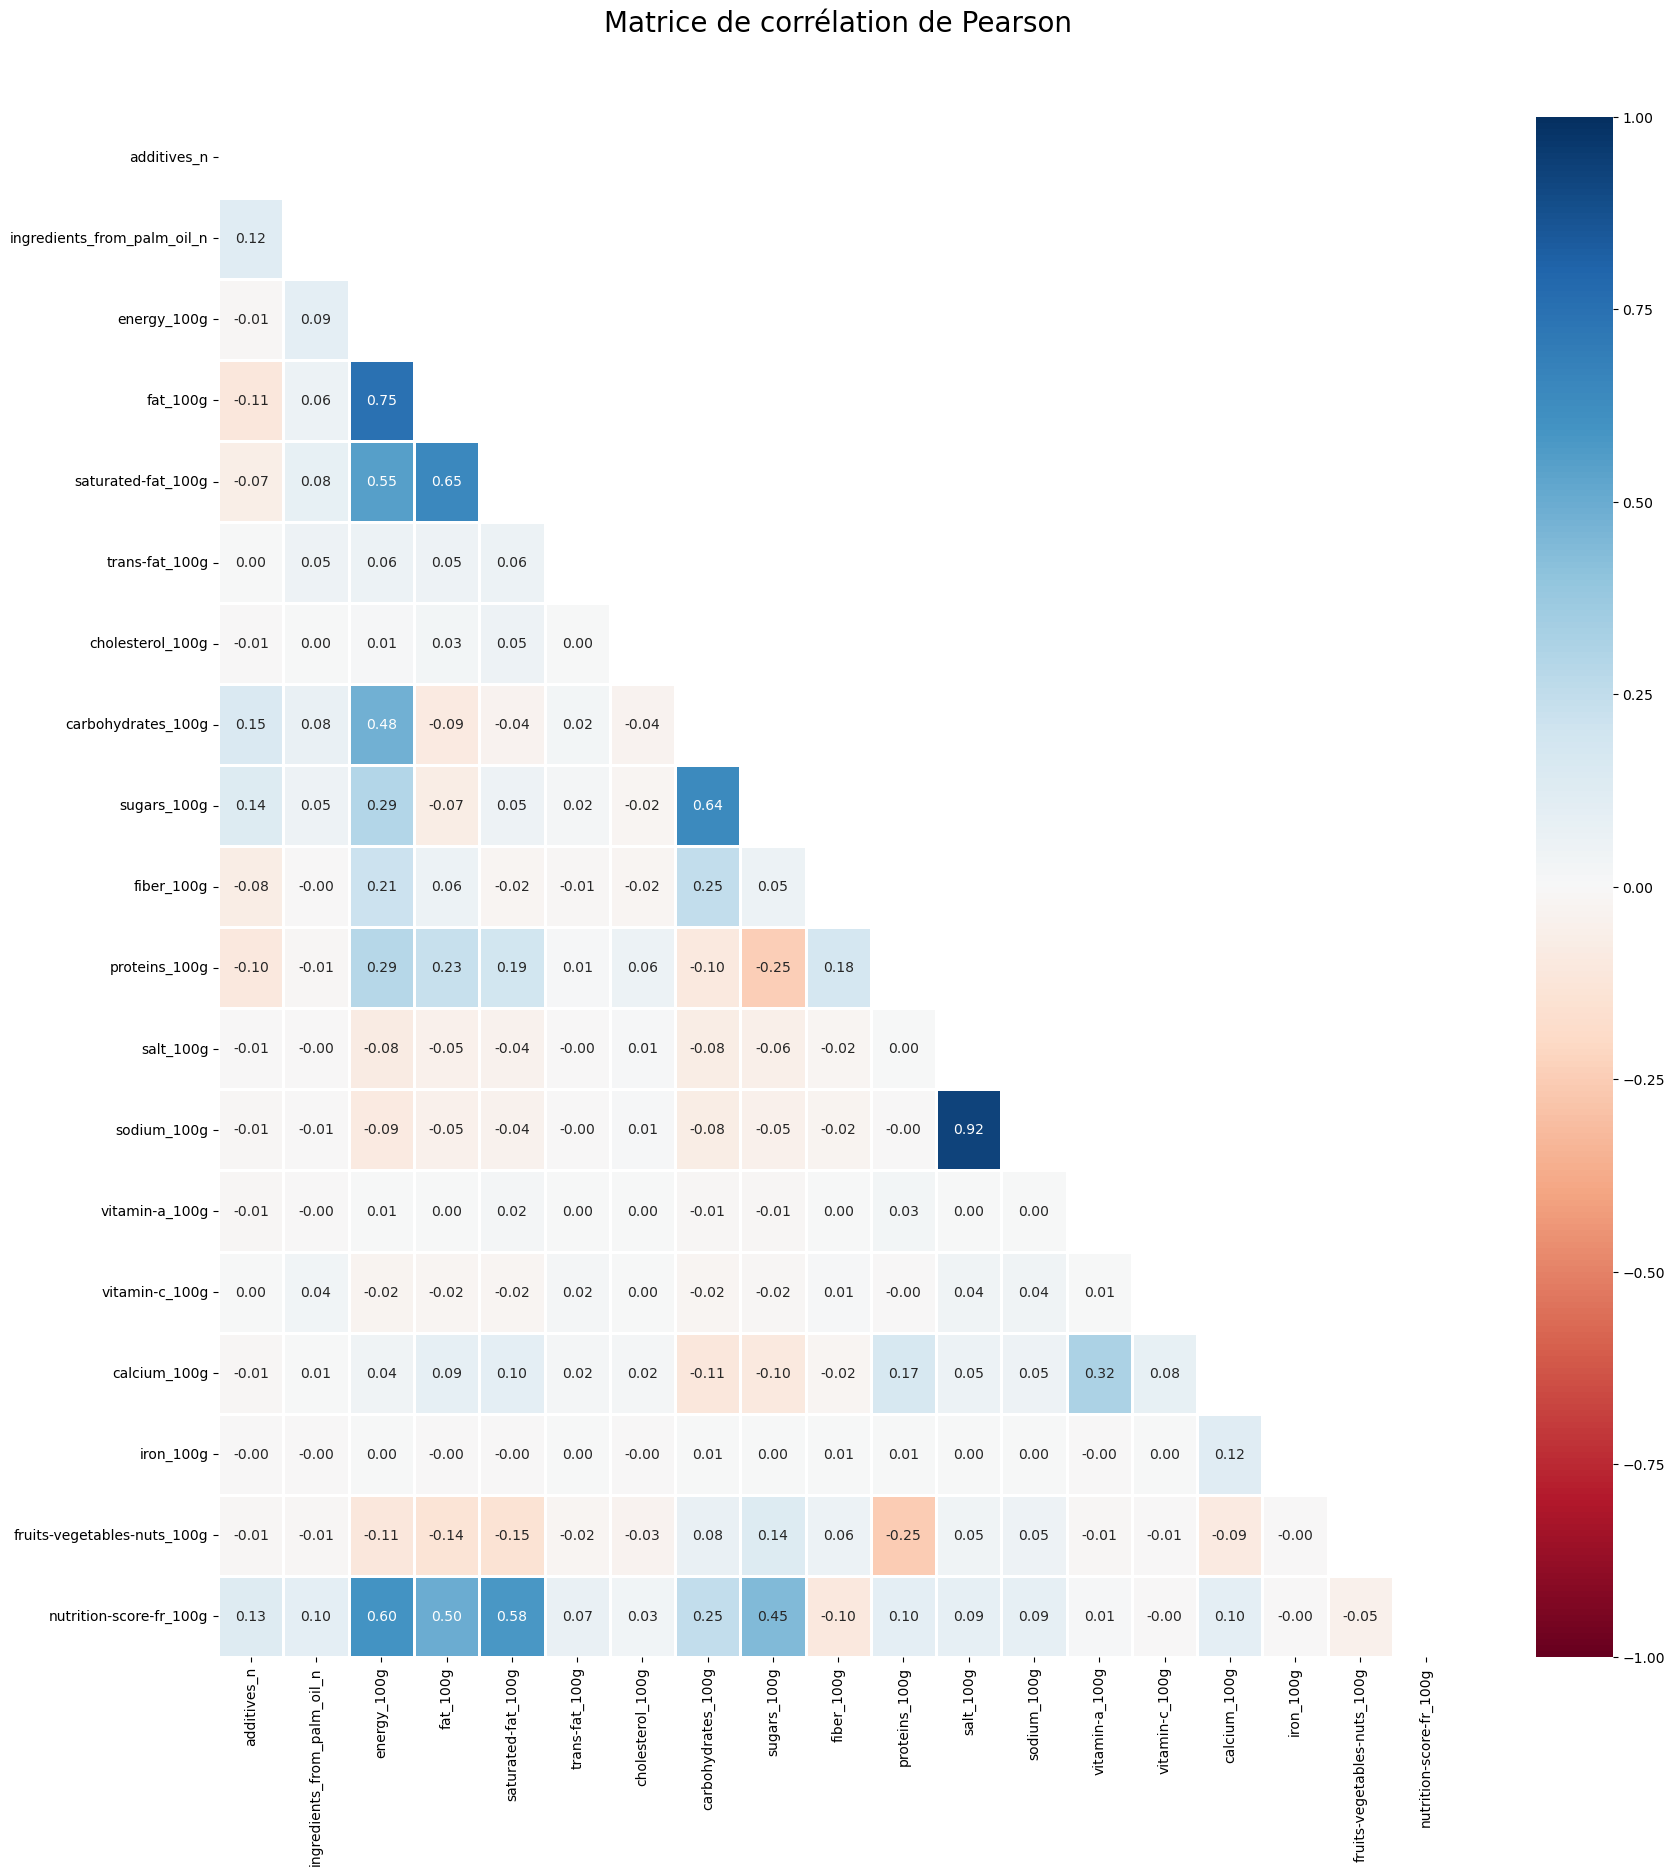

In [8]:
# Matrice de corrélation de Pearson
mask = np.triu(np.ones_like(df_nutri[variable_float64].corr(), dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(df_nutri[variable_float64].corr(), mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Matrice de corrélation de Pearson', fontsize=20, y=1.05)
plt.show()

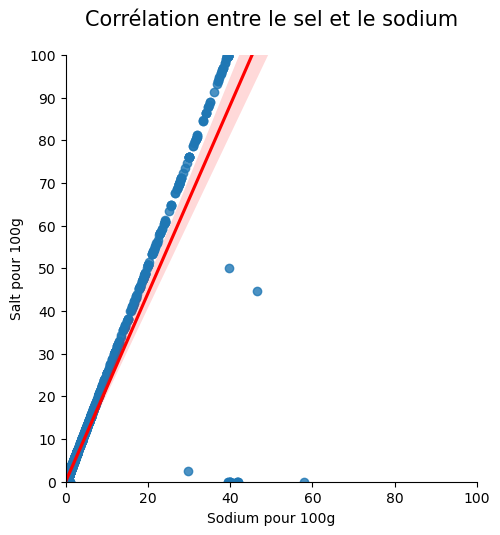

In [9]:
# Prenons un échantillon du dataframe
échantillon = df_nutri.sample(25000)

# Affichons un nuage de point pour voir la corrélation entre sodium_100g et salt_100g
sns.lmplot(x='sodium_100g', y='salt_100g', data=échantillon, line_kws={'color': 'red'})
plt.title("Corrélation entre le sel et le sodium", fontsize=15, y=1.05)
plt.xlabel('Sodium pour 100g')
plt.xlim(0,100)
plt.ylabel('Salt pour 100g')
plt.ylim(0, 100)
plt.yticks(np.arange(0,105,10))
plt.show()

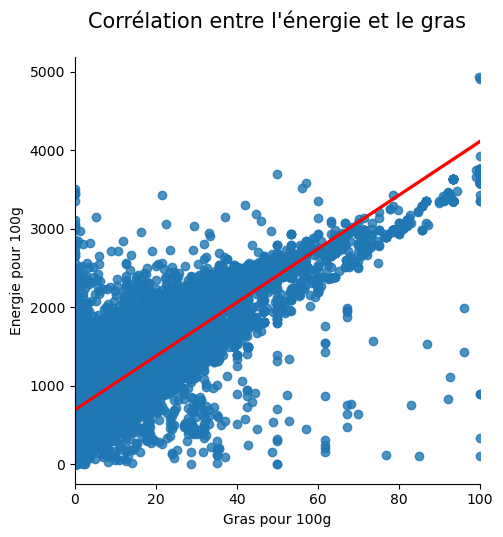

In [10]:
# Affichons un nuage de point pour voir la corrélation entre fat_100g et energy_100g
sns.lmplot(x='fat_100g', y='energy_100g', data=échantillon, line_kws={'color': 'red'})
plt.title("Corrélation entre l'énergie et le gras", fontsize=15, y=1.05)
plt.xlabel('Gras pour 100g')
plt.xlim(0,100)
plt.ylabel('Energie pour 100g')
plt.show()

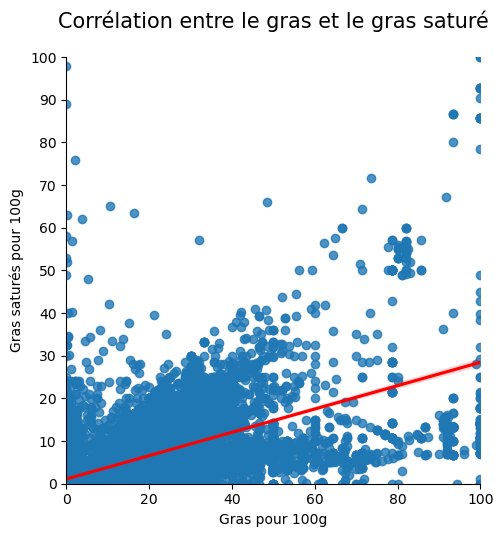

In [11]:
# Affichons un nuage de point pour voir la corrélation entre fat_100g et saturated-fat_100g
sns.lmplot(x='fat_100g', y='saturated-fat_100g', data=échantillon, line_kws={'color': 'red'})
plt.title("Corrélation entre le gras et le gras saturé", fontsize=15, y=1.05)
plt.xlabel('Gras pour 100g')
plt.xlim(0,100)
plt.ylabel('Gras saturés pour 100g')
plt.ylim(0, 100)
plt.yticks(np.arange(0,105,10))
plt.show()

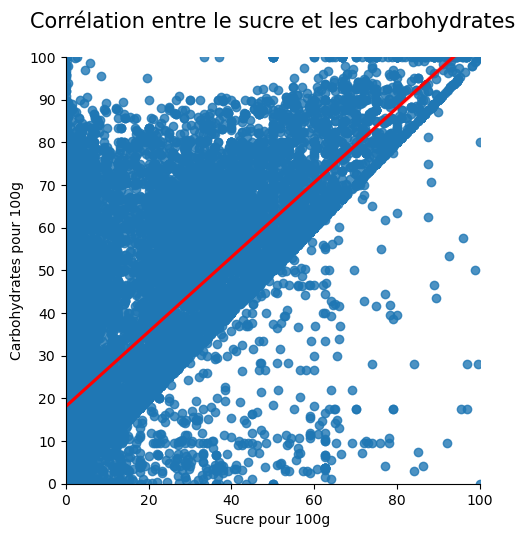

In [12]:
# Affichons un nuage de point pour voir la corrélation entre sugars_100g et carbohydrates_100g
sns.lmplot(x='sugars_100g', y='carbohydrates_100g', data=échantillon, line_kws={'color': 'red'})
plt.title("Corrélation entre le sucre et les carbohydrates", fontsize=15, y=1.05)
plt.xlabel('Sucre pour 100g')
plt.xlim(0,100)
plt.ylabel('Carbohydrates pour 100g')
plt.ylim(0, 100)
plt.yticks(np.arange(0,105,10))
plt.show()

Au vu de la corréation entre ces différentes variables, on peut décider de supprimer les variables :
- sodium_100g,
- fat_100g,
- carbohydrates_100g.

In [13]:
# Suppression des variables : sodium_100g, fat_100g et carbohydrates_100g
df_nutri.drop(['sodium_100g', 'fat_100g', 'carbohydrates_100g'], axis=1, inplace=True)

# Mise à jours de variable_float64
variable_float64 = df_nutri.select_dtypes(include=['float64']).columns

### 3.2 Analyse en Composantes Principales (ACP) <a class="anchor" id="3_2"></a>

Objectif de l'ACP : chercher le nombre optimal de dimensions pour réduire le nombre de variables tout en maximisant la variance expliquée.

#### 3.2.1 Preprocessing des données <a class="anchor" id="3_2_1"></a>

In [14]:
# X la matrice des données
X = df_nutri[variable_float64].values

# Il faut scaler les données dans un premier temps. On instancie : 
scaler = MinMaxScaler()

# On entraine le scaler sur nos données : 
scaler.fit(X)

# On transforme nos données
X_scaled = scaler.transform(X)

In [15]:
# Demander une ACP normée
acp = PCA(std_unit=False, stats=True, col_labels=df_nutri[variable_float64].columns, row_labels=df_nutri.product_name)

# ACP à partir de la matrice numpy
acp.fit(X_scaled)

PCA(col_labels=Index(['additives_n', 'ingredients_from_palm_oil_n', 'energy_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'vitamin-a_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'fruits-vegetables-nuts_100g', 'nutrition-score-fr_100g'],
      dtype='object'),
    row_labels=0                            Banana Chips Sweetened (Whole)
1                                                   Peanuts
2                                    Organic Salted Nut Mix
3                                           Organic Polenta
4                         Breadshop Honey Gone Nuts Granola
                                ...                        
259534                                          Test NF App
259535                                              Amandes
259536                                   Thé vert Earl grey
259537    Mint Melange Tea A Blend Of Peppermint, Lemon ...
259538                      Sugar Free Drink Mix, Peach Tea
Name: product_name, Length: 259539, dtype: object,
    std_unit=False)

#### 3.2.2 Eboulie des valeurs propres <a class="anchor" id="3_2_2"></a>

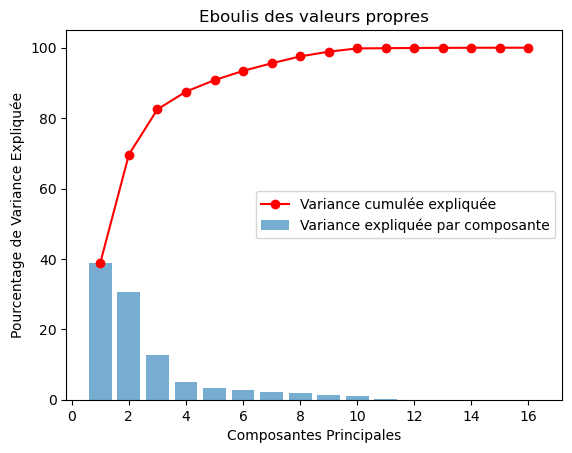

In [16]:
# Obtenir les valeurs propres à partir de l'objet ACP
eigenvalues = acp.eig_[1]

# Calculer le pourcentage de variance expliquée
explained_variance_ratio = eigenvalues / eigenvalues.sum()

# Calculer le pourcentage de variance cumulée
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()*100

# Créer une liste d'entiers pour l'axe des composantes principales
component_numbers = range(1, len(eigenvalues) + 1)

# Créer un scree plot
plt.bar(component_numbers, explained_variance_ratio*100, alpha=0.6, align='center', label='Variance expliquée par composante')
plt.plot(component_numbers, cumulative_explained_variance_ratio, marker='o', linestyle='-', c='r', label='Variance cumulée expliquée')
plt.xlabel('Composantes Principales')
plt.ylabel('Pourcentage de Variance Expliquée')
plt.title('Eboulis des valeurs propres')
plt.legend()
plt.show()

L’éboulis affiche la proportion de variance expliquée par chaque composante principale.
Nous cherchons le point où l'inertie expliquée atteint un plateau.

Les 4 premières composantes principales capturent 87,57% de l'inertie, c'est-à-dire de la variance expliquée.
Les autres composantes expliquent un pourcentage de variance trop faible pour être significatif.

#### 3.2.3 Informations sur les variables <a class="anchor" id="3_2_3"></a>

In [17]:
# Informations sur les variables
info_var = acp.col_topandas()
info_var.columns

Index(['col_coord_dim1', 'col_coord_dim2', 'col_coord_dim3', 'col_coord_dim4',
       'col_coord_dim5', 'col_coord_dim6', 'col_coord_dim7', 'col_coord_dim8',
       'col_coord_dim9', 'col_coord_dim10', 'col_coord_dim11',
       'col_coord_dim12', 'col_coord_dim13', 'col_coord_dim14',
       'col_coord_dim15', 'col_coord_dim16', 'col_contrib_dim1',
       'col_contrib_dim2', 'col_contrib_dim3', 'col_contrib_dim4',
       'col_contrib_dim5', 'col_contrib_dim6', 'col_contrib_dim7',
       'col_contrib_dim8', 'col_contrib_dim9', 'col_contrib_dim10',
       'col_contrib_dim11', 'col_contrib_dim12', 'col_contrib_dim13',
       'col_contrib_dim14', 'col_contrib_dim15', 'col_contrib_dim16',
       'col_cos2_dim1', 'col_cos2_dim2', 'col_cos2_dim3', 'col_cos2_dim4',
       'col_cos2_dim5', 'col_cos2_dim6', 'col_cos2_dim7', 'col_cos2_dim8',
       'col_cos2_dim9', 'col_cos2_dim10', 'col_cos2_dim11', 'col_cos2_dim12',
       'col_cos2_dim13', 'col_cos2_dim14', 'col_cos2_dim15', 'col_cos2_dim16'],


In [18]:
# Coordonnées des variables (corrélations avec les axes)
info_var[['col_coord_dim1','col_coord_dim2','col_coord_dim3','col_coord_dim4']]

,col_coord_dim1,col_coord_dim2,col_coord_dim3,col_coord_dim4
additives_n,0.002115,0.011889,0.007902,-0.029146
ingredients_from_palm_oil_n,0.000082,0.006756,-0.003905,-0.003583
energy_100g,-0.008925,0.085328,-0.073725,0.060654
saturated-fat_100g,-0.011317,0.032662,-0.046369,-0.002916
trans-fat_100g,-0.000145,0.000588,-0.000546,-0.000152
cholesterol_100g,-0.000109,0.000028,-0.000120,-0.000062
sugars_100g,0.072293,0.173885,0.091207,0.014267
fiber_100g,0.002741,0.001221,-0.001594,0.022391
proteins_100g,-0.026399,-0.000524,-0.035007,0.027284
salt_100g,0.002301,-0.002069,-0.005045,-0.018194


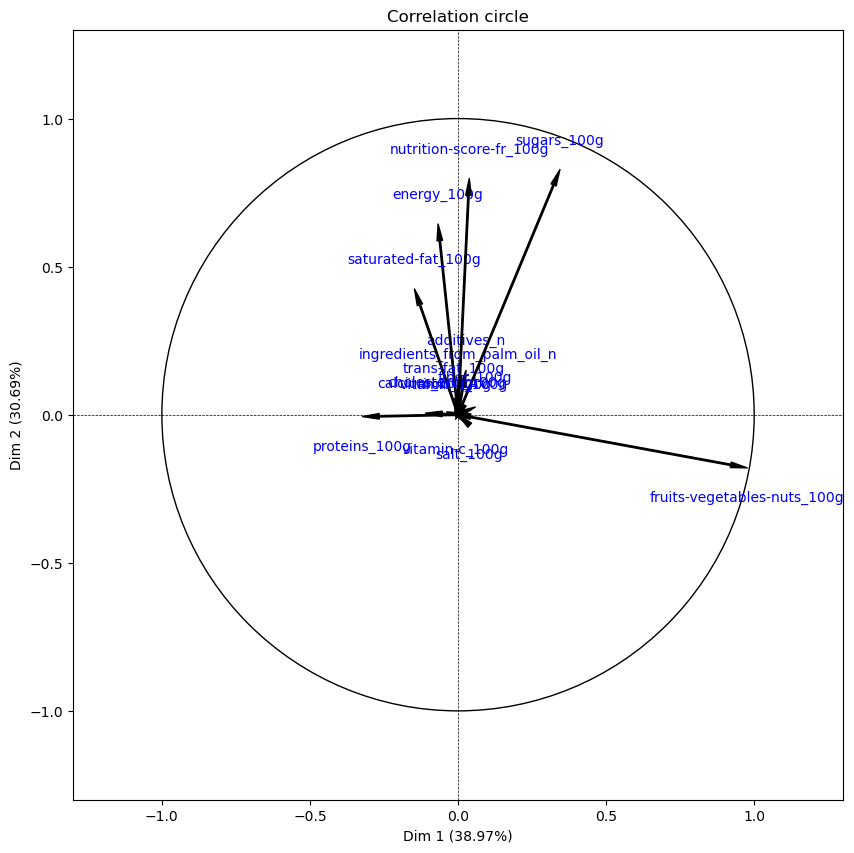

In [19]:
# Cercle de corrélations pour les dimensions 1 et 2
acp.correlation_circle(num_x_axis=1, num_y_axis=2, figsize=(10,10))

À travers l'analyse des cercles des corrélations, nous pouvons observer que F1 présente une corrélation positive avec les produits à base de fruits, légumes et noix. En revanche, F2 affiche une corrélation positive avec le sucre, le score nutritionnel, l'énergie et les matières grasses saturées.
En d'autres termes, si nous nous déplaçons le long de l'axe F1, nous rencontrons des produits de plus en plus centrés sur les fruits, les légumes, et les noix. En revanche, un déplacement le long de l'axe F2 nous conduit vers des produits de plus en plus riches en sucres, en matières grasses, et avec un score nutritionnel élevé.
Ainsi, F2 se révèle être la composante déterminante pour le grade du Nutri-Score, reflétant la qualité nutritionnelle des produits.

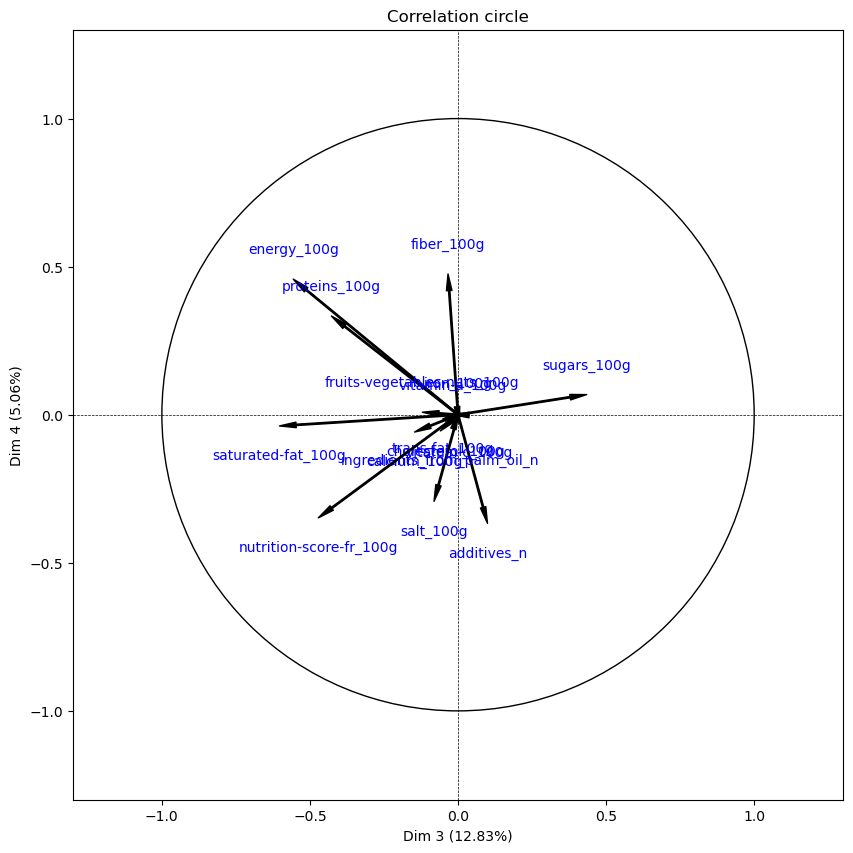

In [20]:
# Cercle de corrélations pour les dimensions 3 et 4
acp.correlation_circle(num_x_axis=3, num_y_axis=4, figsize=(10,10))

En explorant les corrélations, nous constatons que la composante F3 affiche une corrélation positive avec le sucre et une corrélation négative avec les matières grasses saturées, le score nutritionnel, l'énergie et les protéines. En se déplaçant le long de l'axe F3, nous observons une augmentation des niveaux de sucre. Par contre, plus nous nous déplaçons vers la gauche, plus les produits deviennent caloriques et sont moins bien notés.
D'autre part, la composante F4 est corrélée avec la teneur en fibres et en protéines. En suivant l'axe F4, nous sommes en présence de produits de mieux en mieux notés sur le plan nutritionnel, car ils sont riches en fibres et en protéines.
Ainsi, F3 et F4 nous fournissent des informations cruciales sur la teneur en sucre, la densité calorique et la qualité nutritionnelle des produits.

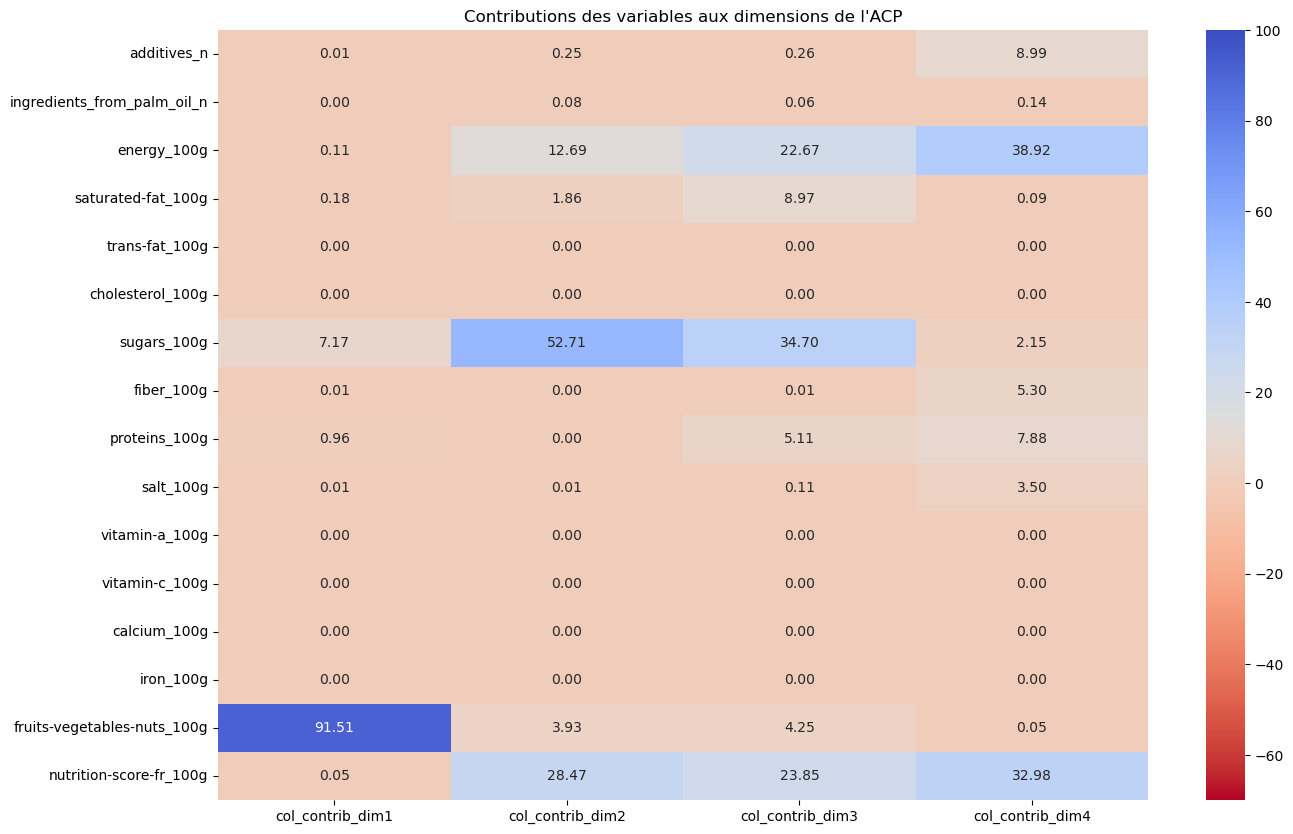

In [21]:
# Contributions des variables (corrélations avec les axes)
contribution = info_var[['col_contrib_dim1','col_contrib_dim2','col_contrib_dim3','col_contrib_dim4']]

# Créez une heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(contribution, vmin=-70, vmax=100, annot=True, cmap='coolwarm_r', fmt='.2f')
plt.title("Contributions des variables aux dimensions de l'ACP")
plt.show()

#### 3.2.4 Informations sur les individus <a class="anchor" id="3_2_4"></a>

In [22]:
# Coordonnées et autres informations
info_indiv = acp.row_topandas()
info_indiv.columns

Index(['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4',
       'row_coord_dim5', 'row_coord_dim6', 'row_coord_dim7', 'row_coord_dim8',
       'row_coord_dim9', 'row_coord_dim10', 'row_coord_dim11',
       'row_coord_dim12', 'row_coord_dim13', 'row_coord_dim14',
       'row_coord_dim15', 'row_coord_dim16', 'row_contrib_dim1',
       'row_contrib_dim2', 'row_contrib_dim3', 'row_contrib_dim4',
       'row_contrib_dim5', 'row_contrib_dim6', 'row_contrib_dim7',
       'row_contrib_dim8', 'row_contrib_dim9', 'row_contrib_dim10',
       'row_contrib_dim11', 'row_contrib_dim12', 'row_contrib_dim13',
       'row_contrib_dim14', 'row_contrib_dim15', 'row_contrib_dim16',
       'row_cos2_dim1', 'row_cos2_dim2', 'row_cos2_dim3', 'row_cos2_dim4',
       'row_cos2_dim5', 'row_cos2_dim6', 'row_cos2_dim7', 'row_cos2_dim8',
       'row_cos2_dim9', 'row_cos2_dim10', 'row_cos2_dim11', 'row_cos2_dim12',
       'row_cos2_dim13', 'row_cos2_dim14', 'row_cos2_dim15', 'row_cos2_dim16'],


In [23]:
# Coordonnées dans le plan
info_indiv[['row_coord_dim1', 'row_coord_dim2', 'row_coord_dim3', 'row_coord_dim4']]

,row_coord_dim1,row_coord_dim2,row_coord_dim3,row_coord_dim4
product_name,,,,
Banana Chips Sweetened (Whole),0.216883,0.083655,-0.254856,0.076828
Peanuts,-0.042285,-0.028840,0.023837,0.246019
Organic Salted Nut Mix,0.349330,-0.062508,-0.323472,0.169737
Organic Polenta,-0.320693,-0.190097,0.075692,0.208119
Breadshop Honey Gone Nuts Granola,-0.295265,-0.032351,0.051692,0.230025
...,...,...,...,...
Test NF App,0.193689,-0.158933,-0.009210,-0.012756
Amandes,-0.268396,-0.059670,-0.075317,0.290568
Thé vert Earl grey,-0.300381,-0.199641,0.147361,-0.069359


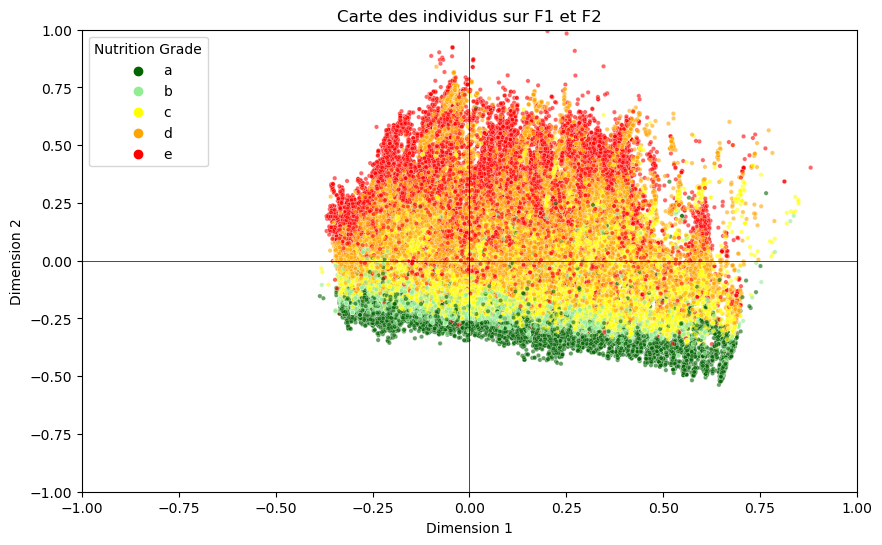

In [24]:
# Sélectionner les deux premières dimensions de l'ACP
num_x_axis = 1
num_y_axis = 2

# Créer un nuage de points pour les individus
plt.figure(figsize=(10, 6))

# Définir une palette de couleurs pour les grades nutritionnels
palette = {'a': 'darkgreen', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}

# Obtenir l'ordre alphabétique des grades nutritionnels
nutrition_grade_order = sorted(df_nutri['nutrition_grade_fr'].unique())

# Colorier les points en fonction de la variable qualitative 'nutrition_grade_fr' avec l'ordre alphabétique
sns.scatterplot(x=acp.row_coord_[:, num_x_axis - 1], y=acp.row_coord_[:, num_y_axis - 1],
                hue=df_nutri['nutrition_grade_fr'], palette=palette, hue_order=nutrition_grade_order, s=10, alpha=0.6)

# Ajouter des axes et des étiquettes pour les axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel(f'Dimension {num_x_axis}')
plt.xlim(-1, 1)
plt.ylabel(f'Dimension {num_y_axis}')
plt.ylim(-1, 1)
plt.title('Carte des individus sur F1 et F2')

# Afficher la légende
plt.legend(title='Nutrition Grade')

# Afficher le graphique
plt.show()

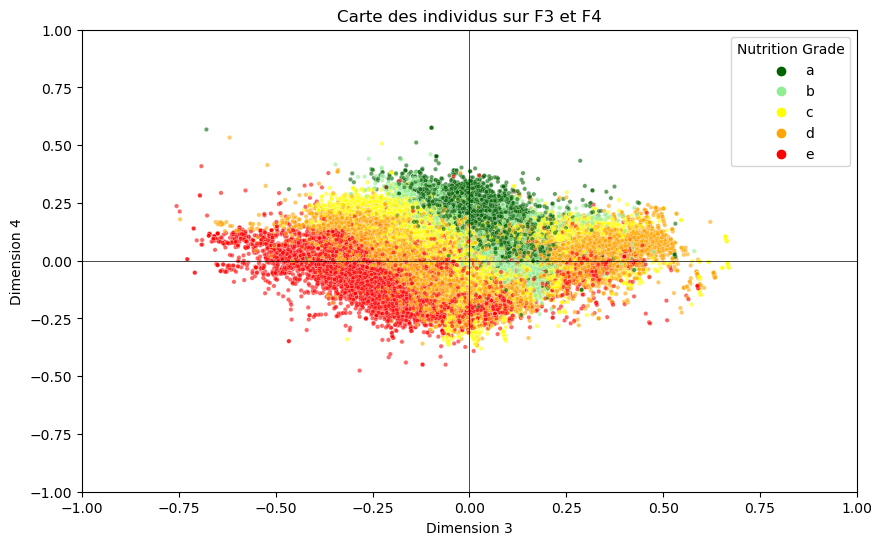

In [25]:
# Sélectionner les deux premières dimensions de l'ACP
num_x_axis = 3
num_y_axis = 4

# Créer un nuage de points pour les individus
plt.figure(figsize=(10, 6))

# Définir une palette de couleurs pour les grades nutritionnels
palette = {'a': 'darkgreen', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}

# Obtenir l'ordre alphabétique des grades nutritionnels
nutrition_grade_order = sorted(df_nutri['nutrition_grade_fr'].unique())

# Colorier les points en fonction de la variable qualitative 'nutrition_grade_fr' avec l'ordre alphabétique
sns.scatterplot(x=acp.row_coord_[:, num_x_axis - 1], y=acp.row_coord_[:, num_y_axis - 1],
                hue=df_nutri['nutrition_grade_fr'], palette=palette, hue_order=nutrition_grade_order, s=10, alpha=0.6)

# Ajouter des axes et des étiquettes pour les axes
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel(f'Dimension {num_x_axis}')
plt.xlim(-1, 1)
plt.ylabel(f'Dimension {num_y_axis}')
plt.ylim(-1, 1)
plt.title('Carte des individus sur F3 et F4')

# Afficher la légende
plt.legend(title='Nutrition Grade')

# Afficher le graphique
plt.show()

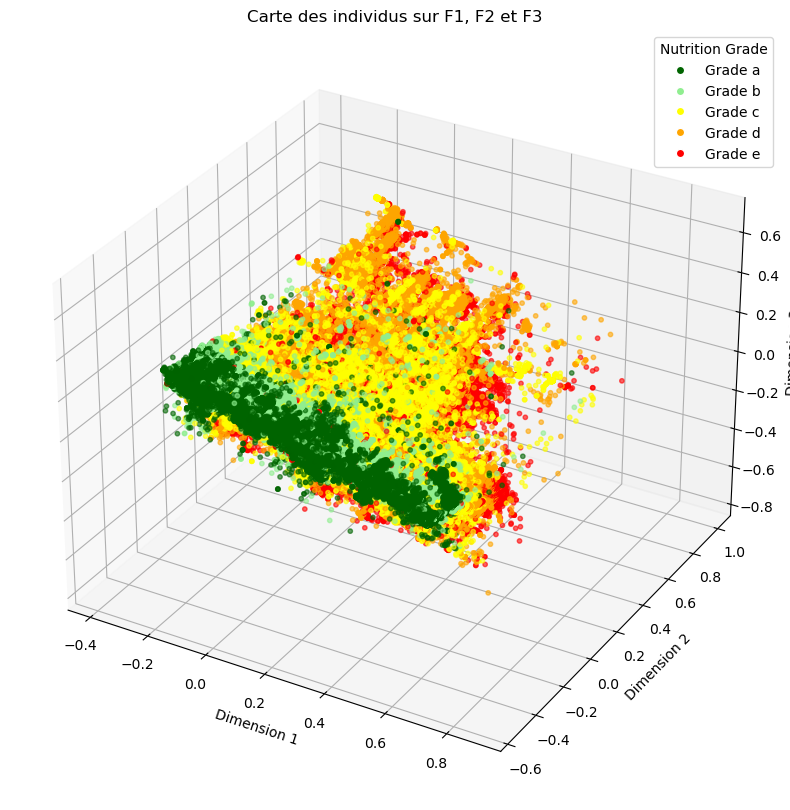

In [26]:
# Sélectionner les trois premières dimensions de l'ACP
num_x_axis = 1
num_y_axis = 2
num_z_axis = 3

# Créer une figure 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Mapper les grades nutritionnels à des couleurs
grade_to_color = {'a': 'darkgreen', 'b': 'lightgreen', 'c': 'yellow', 'd': 'orange', 'e': 'red'}

# Créer une liste de couleurs en fonction des grades nutritionnels
colors = df_nutri['nutrition_grade_fr'].map(grade_to_color)

# Créer le nuage de points 3D
scatter = ax.scatter(
    acp.row_coord_[:, num_x_axis - 1],
    acp.row_coord_[:, num_y_axis - 1],
    acp.row_coord_[:, num_z_axis - 1],
    c=colors,  # Utilisez la liste de couleurs
    s=10,  # Réglez la taille des points
    alpha=0.6  # Réglez la transparence
)

# Ajouter des axes et des étiquettes pour les axes
ax.set_xlabel(f'Dimension {num_x_axis}')
ax.set_ylabel(f'Dimension {num_y_axis}')
ax.set_zlabel(f'Dimension {num_z_axis}')
plt.title('Carte des individus sur F1, F2 et F3')

# Créer une légende triée par ordre alphabétique des grades nutritionnels
legend_labels = [f'Grade {grade}' for grade in sorted(df_nutri['nutrition_grade_fr'].unique())]
scatter_legend = ax.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=grade_to_color[label[-1]]) for label in legend_labels], title='Nutrition Grade', labels=legend_labels)

# Afficher le plot 3D
plt.grid()
plt.show()

## 4. ANOVA <a class="anchor" id="4"></a>

Nous allons étudier l'impact de la catégorie des produits sur le nutrition-score. Pour cela nous aurons besoin des différentes catégories que nous pouvons trouver dans notre jeu de données.

In [27]:
# Afficher un tableau avec les différentes catégories présentes dans le jeu de données
categ = df_nutri['pnns_groups_2'].value_counts()

# Créer un DataFrame avec les titres de colonnes 'Catégorie' et 'Effectif'
df_categ = pd.DataFrame({'Catégorie': categ.index, 'Effectif': categ.values})
df_categ

,Catégorie,Effectif
0,unknown,203628
1,One-dish meals,4933
2,Biscuits and cakes,4024
3,Cereals,3687
4,Sweets,3600
5,Cheese,3511
6,Milk and yogurt,2914
7,Dressings and sauces,2782
8,Chocolate products,2635
9,Processed meat,2544


Pour notre étude, nous avons besoin que les catégories soient connuent et au vu du nombre de données, nous pouvons supprimer les catégories 'unknown'.

In [28]:
# Créer une copie du DataFrame df_nutri
df_anova = df_nutri.copy()

# Supprimer toutes les lignes où la colonne 'pnns_groups_2' est égale à 'unknown'
df_anova = df_anova[df_anova['pnns_groups_2'] != 'unknown']

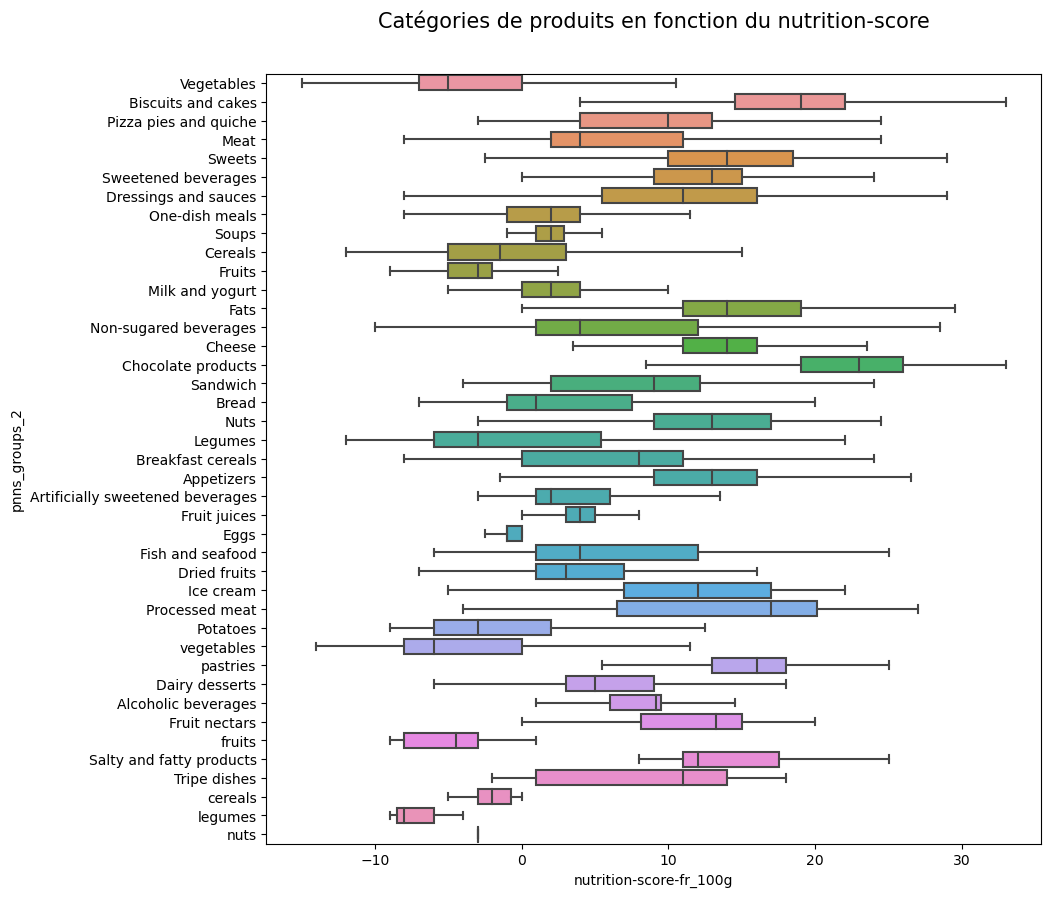

In [29]:
# Boxplot des catégories de produits en fonction du nutriscore
plt.figure(figsize=(10,10))
sns.boxplot(x= 'nutrition-score-fr_100g', y='pnns_groups_2', data = df_anova, showfliers=False)
plt.title("Catégories de produits en fonction du nutrition-score", fontsize=15, y=1.05)
plt.show()

On constate ici que les catégories de produits sont assez différents. Mais est-ce que ces écarts sont significatifs ?

In [30]:
# Renommer la colonne en remplaçant '-' par '_'
df_anova.rename(columns={'nutrition-score-fr_100g': 'nutrition_score_fr_100g'}, inplace=True)

# Lançons l'ANOVA pour tester l'influence des catégories de produits
anova_categ = smf.ols('nutrition_score_fr_100g ~ pnns_groups_2', data=df_anova).fit()
print(anova_categ.summary())

                               OLS Regression Results                              
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.535
Model:                                 OLS   Adj. R-squared:                  0.535
Method:                      Least Squares   F-statistic:                     1607.
Date:                     Tue, 17 Oct 2023   Prob (F-statistic):               0.00
Time:                             10:05:31   Log-Likelihood:            -1.8090e+05
No. Observations:                    55911   AIC:                         3.619e+05
Df Residuals:                        55870   BIC:                         3.622e+05
Df Model:                               40                                         
Covariance Type:                 nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

Le modèle global explique 53,5% de la variance totale des données. Cela suggère que les catégories de produits jouent un rôle significatif dans la variation du nutrition-score.

Interprétation des Coefficients : 
* Les coefficients associés à chaque catégorie de produits fournissent un aperçu de leur impact sur le nutrition-score.Par exemple, la catégorie « Biscuits and cakes » a un coefficient positif de 9,696, ce qui signifie que ces produits ont tendance à avoir un nutrition-score plus élevé.
* En revanche, la catégorie « Fruits  » affiche un coefficient négatif de -9,883, indiquant que les produits de cette catégorie ont généralement un nutrition-score plus bas.


Pour obtenir le tableau de l'analyse de la variance, on utilise la commande anova_lm :

In [31]:
sm.stats.anova_lm(anova_categ, typ=2)

,sum_sq,df,F,PR(>F)
pnns_groups_2,2.434066e+06,40.0,1607.405223,0.0
Residual,2.115074e+06,55870.0,NaN,NaN


La p-valeur du test de Fisher 0.00 est très petite et largement inférieure à 5 %. On rejette donc l'hypothèse H0 selon laquelle $α_{1}=α_{2}=α_{3}=α_{4}=...=α_{41}=0$.

*La catégorie du produit a donc bien un effet sur le nutrition-score, comme nous en avions l'intuition en regardant les boîtes à moustaches.*